# Qui êtes-vous ?
<div class="alert alert-block alert-info">
Écrire ci-dessous votre nom, prénom et numéro étudiant :
</div>

In [1]:
# FAURE Guillaume 21108390
# LUCAS Garance 21200408

In [2]:
#%pip install lime
#stabilité des résultats, attribut corrélé, 

# TME 03 - Opérateurs d'agrégation et LIME

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## A - Opérateurs d'agrégation

<div class="alert alert-block alert-warning">
L'objet de la 1ère partie de TME est de tracer les lignes de niveaux des opérateurs d'agrégation vus en cours
</div>

<div class="alert alert-block alert-info">
    Ecrire une fonction qui calcule la moyenne pondérée d'un vecteur <code>x</code> en fonction d'un vecteur <code>poids</code>
</div>

In [4]:
def moyenne_pondérée(x, w):
    return np.dot(x, w) 

In [5]:
poids = np.array ([1/10, 9/10])
x = np.array( [1, 2])
moyenne_p = moyenne_pondérée(x, poids)
print(moyenne_p)


1.9000000000000001


<div class="alert alert-block alert-info">
    Ecrire une fonction qui trace les lignes de niveaux d'un opérateur, en l'appliquant à des vecteurs de taille 2.
</div>

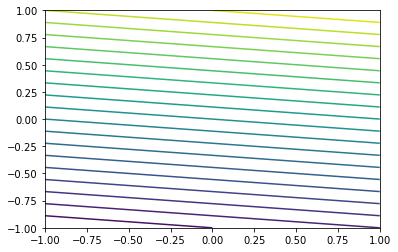

In [6]:
# Ecrire une fonction qui trace les lignes de niveaux d'un opérateur, en l'appliquant à des vecteurs de taille 2.
def lignes_niveaux(opérateur, x1_min, x1_max, x2_min, x2_max, nb_points = 200, nb_ligne=20):
    x1 = np.linspace(x1_min, x1_max, nb_points)
    x2 = np.linspace(x2_min, x2_max, nb_points)
    X1, X2 = np.meshgrid(x1, x2)
    X = np.array([X1, X2])
    Z = np.zeros((nb_points, nb_points))
    for i in range(nb_points):
        for j in range(nb_points):
            Z[i,j] = opérateur(X[:, i, j])
    plt.contour(X1, X2, Z, nb_ligne)

lignes_niveaux(lambda x: moyenne_pondérée(x, poids), -1, 1, -1, 1)


<div class="alert alert-block alert-info">
    Ecrire une fonction qui calcule un OWA d'un vecteur <code>x</code> en fonction d'un vecteur <code>poids</code>
</div>

In [7]:
def OWA(x, w):
    return np.sort(x) @ w

1.9000000000000001


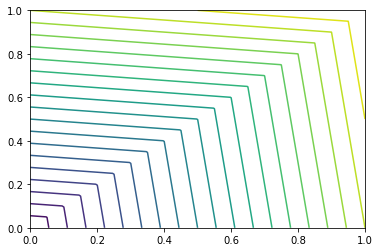

In [8]:
poids = np.array ([1/10, 9/10])
x = np.array( [1, 2])
print(OWA(x, poids))
lignes_niveaux(lambda x: OWA(x, poids), 0, 1, 0, 1)

<div class="alert alert-block alert-info">
    Visualiser les lignes de niveaux de différentes configurations des moyennes pondérées et des OWA pour différents vecteurs de poids.    
</div>

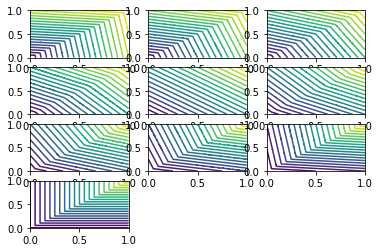

In [9]:
for i in range (1, 11):
    plt.subplot(4, 3, i )
    poids = np.array ([i/10, 1-i/10])
    lignes_niveaux(lambda x: OWA(x, poids), 0, 1, 0, 1)
plt.show()

<div class="alert alert-block alert-info">
    Visualiser aussi les lignes de niveaux des opérateurs conjonctifs et disjonctifs vus en cours, ainsi que l'opérateur à comportement variable (intégrale de Gödel), après avoir défini les fonctions permettant de calculer ces opérateurs.
</div>

In [10]:
#conjonctif
def min_conj(u,v):
    return np.minimum(u,v)
def max_conj(u,v):
    return max(u+v-1,0)
def mult(u,v):
    return u*v


#disjonctif
def max_dis(u,v):
    return np.maximum(u,v)
def plus_mul(u,v):
    return u+v-u*v
def min_dis(u,v):
    return min(u+v,1)

# compromis
def moyenne(x):
    return np.sum(x)/len(x)


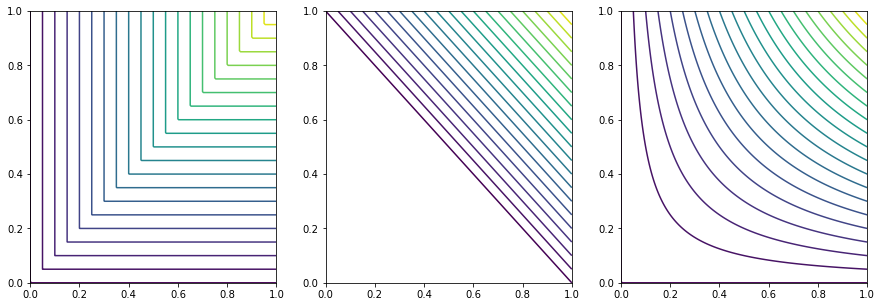

In [11]:
#conjonctif
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1 )
lignes_niveaux(lambda x: min_conj(*x), 0, 1, 0, 1)
plt.subplot(1, 3, 2 )
lignes_niveaux(lambda x: max_conj(*x), 0, 1, 0, 1)
plt.subplot(1, 3, 3 )
lignes_niveaux(lambda x: mult(*x), 0, 1, 0, 1)

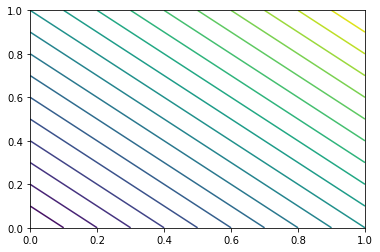

In [12]:
#compromis
lignes_niveaux(lambda x: moyenne(x), 0, 1, 0, 1)

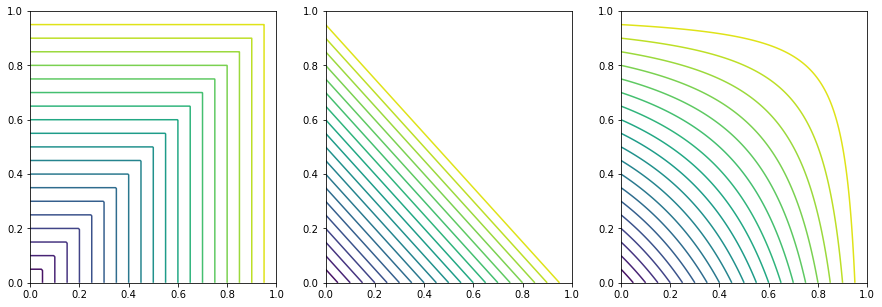

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1 )
lignes_niveaux(lambda x: max_dis(*x), 0, 1, 0, 1)
plt.subplot(1, 3, 2 )
lignes_niveaux(lambda x: min_dis(*x), 0, 1, 0, 1)
plt.subplot(1, 3, 3 )
lignes_niveaux(lambda x: plus_mul(*x), 0, 1, 0, 1)

<div class="alert alert-block alert-info">
    Ecrire une fonction qui calcule l'intégrale de Choquet d'un vecteur <code>x</code> en fonction d'une capacité <code>mu</code>.<br>
    La fonction ne doit pas imposer de restriction au nombre de composantes de <code>x</code>, sa documentation doit expliciter la représentation choisie pour <code>mu</code>, la fonction doit inclure une vérification que <code>mu</code> satisfait les propriétés d'une capacité.
    
</div>

In [14]:
import itertools
def choquet(x,mu):
    sigma = x.argsort()
    sigma2 = list(sigma.copy())
    sig=[]
    for i in reversed(range(len(x))):
        sig.append(frozenset(sigma2))
        sigma2.pop()
    sig.append(frozenset(()))

    c=[]
    for i in range(0, len(x)+1):
        combinations = itertools.combinations(sigma, i)
        for combination in combinations:
            c.append(frozenset(combination))
    mu_dic = {subset: n for subset, n in zip(c, mu)}

    choc = 0
    for i in range(len(x)):
        choc += np.subtract(mu_dic[sig[i]],mu_dic[sig[i-1]]) * x[sigma][i]
    return choc

x = np.array([16,1,13])
mu = [0,0.5,0.5,0.6,0.6,0.7,0.8,1]
print(choquet(x, mu))


-5.8


<div class="alert alert-block alert-info">
    Visualiser les lignes de niveaux de différentes intégrales de Choquet, pour différentes valeurs des paramètres. 
</div>

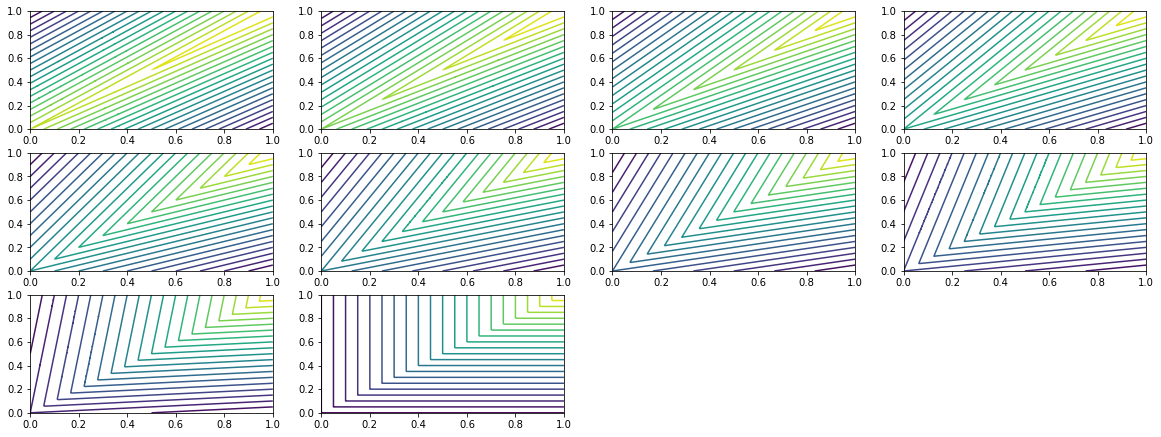

In [15]:
plt.figure(figsize=(20,10))
for i in range(1,11):
    plt.subplot(4, 4, i )
    lignes_niveaux(lambda x: choquet(np.array([*x]), mu =[0,i/10, 1-i/10,1]), 0, 1, 0, 1)

<div class="alert alert-block alert-info">
    Commenter les résultats obtenus. 
</div>

<div>
</div>

# Commentaire :  A vereifier car les niveau me semble chelou

## B - LIME

<div class="alert alert-block alert-warning">
L'objet de cette 2ème partie de TME est de tester l'algorithme LIME sur une tâche de classification assez simple.
</div>

## 1 - Préparation du dataset


<div class="alert alert-block alert-warning">
    Nous allons utiliser les datasets <code>half-moons</code>, que vous savez manipuler, pour permettre la visualisation des résultats et <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">UCI ML Breast Cancer Wisconsin (Diagnostic)</a> qui comporte plus d'attributs.
</div>

<div class="alert alert-block alert-info">
    Tout d'abord, exécuter le bloc ci-dessous pour importer la bibliothèque <code>datasets</code> de <code>sklearn</code>.
</div>

In [17]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

<div class="alert alert-block alert-info">
    Exécuter le bloc suivant pour charger les données <code>breast_cancer</code>.
 </div>

In [18]:
breast_cancer = datasets.load_breast_cancer()

<div class = "alert alert-block alert-info">
    Q1.1 - Visualiser le contenu de la variable <code>breast_cancer</code>.
</div>

In [19]:
print(breast_cancer)
print(breast_cancer.keys())
print(breast_cancer['feature_names'])


{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

<div class = "alert alert-block alert-info">
    Q1.2 - Définir les variables <code>X_train, X_test, y_train, y_test</code> avec <code>train_test_split</code> où vous utiliserez 25% des données pour le test.
</div>

In [20]:
X, y = datasets.load_breast_cancer(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

<div class = "alert alert-block alert-info">
    Q1.3 - Définir la variable <code>feature_names</code> contenant la liste des caractéristiques dans ce dataset ainsi que les noms de classes dans la variable <code>target_names</code>.
</div>

In [21]:
print(breast_cancer['feature_names'])
feature_names = breast_cancer['feature_names']
target_names = breast_cancer['target_names']
print(target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


## 2 - Apprentissage d'un modèle linéaire

<div class="alert alert-block alert-warning">
Nous allons apprendre la tâche de classification en utilisant un modèle de régression logistique.
</div>

<div class = "alert alert-block alert-info">
    Q2.1 - Apprendre un modèle <code>logreg</code> de régression logistique sur les données.
</div>

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

<div class = "alert alert-block alert-info">
    Q2.2 - Dans <code>y_pred</code>, calculer les prédictions sur les données de test.
</div>

In [23]:
y_pred = lr.predict(x_test)
print(y_pred)

[0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]


<div class = "alert alert-block alert-info">
    Q2.3 - Avec <code>confusion_matrix</code>, donner la matrice de confusion sur les données de test.
</div>

In [24]:
#%pip install seaborn

tn 52 fp 1 fn 6 tp 84
accuracy 0.951048951048951


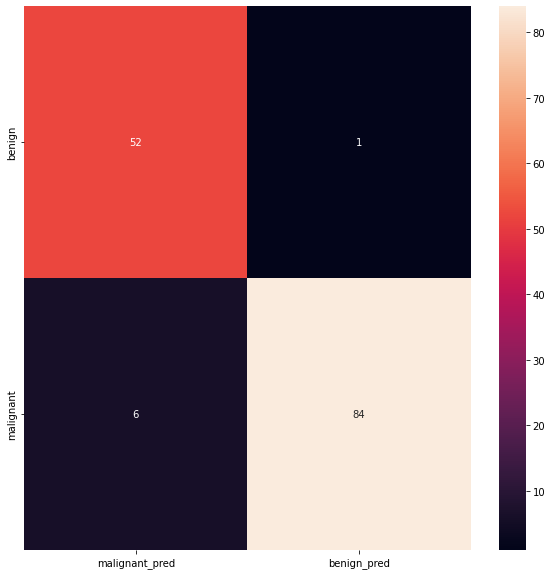

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

m = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("tn",tn,"fp",fp,"fn",fn,"tp",tp)
df_cm = pd.DataFrame(m, index = [target_names[1], target_names[0]],
                  columns = [    target_names[0]+"_pred", target_names[1]+"_pred"])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True)
acc = accuracy_score(y_test, y_pred)
print("accuracy",acc)

<div class = "alert alert-block alert-info">
    Q2.3 - Avec <code>f1_score</code>, calculer le score f1.
</div>

In [26]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='binary')

0.96

<div class = "alert alert-block alert-info">
    Q2.4 - En utilisant les labels des caractéristiques du dataset, dessiner un diagramme en barre de l'importance de chaque caractéristique apprise par la régression logistique.
</div>

[ 0.66190254  0.16217328 -0.14716     0.02139994 -0.14684128 -0.16898114
 -0.34826323 -0.21116346 -0.29781311 -0.02566732 -0.02490166  1.04049519
 -0.00452951 -0.10980541 -0.01271142  0.06943453 -0.00328213 -0.02284313
 -0.02966001  0.01639379  0.32333911 -0.39027003 -0.22721131 -0.01056835
 -0.25804263 -0.57382696 -1.13266698 -0.45173965 -0.64173228 -0.08110189]


<AxesSubplot:>

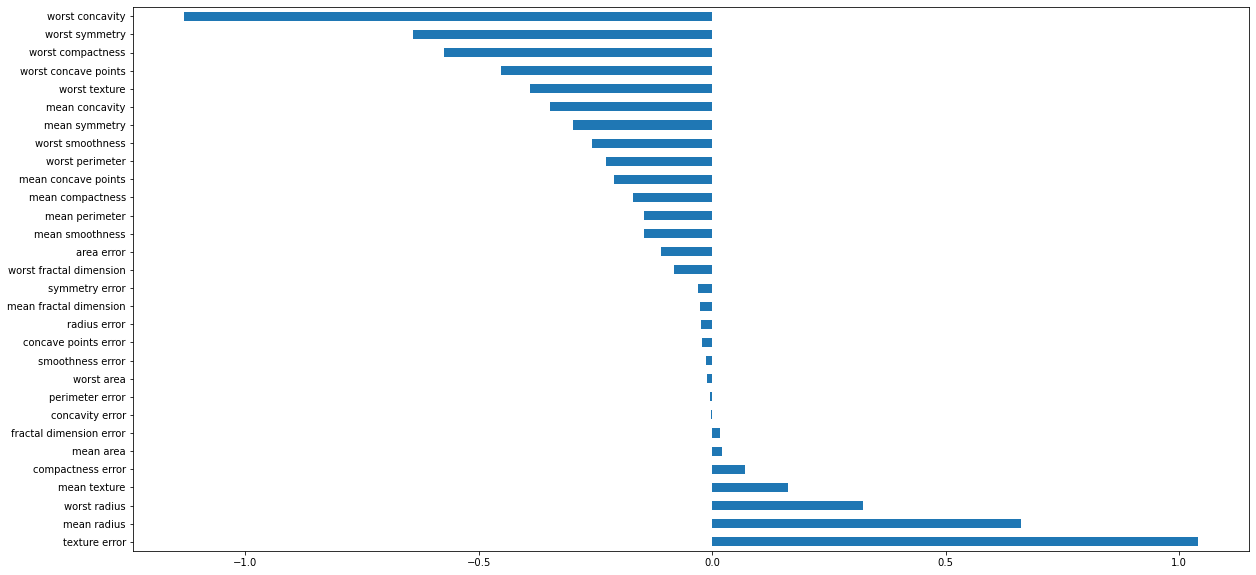

In [27]:
import pandas as pd
coefs = lr.coef_[0]
print(coefs)
plt.figure(figsize=(20,10))
pd.Series(coefs, index=feature_names).nlargest(coefs.size).plot(kind='barh')

<div class = "alert alert-block alert-info">
    Q2.5 - De la même manière, donner les importances du premier exemple de la base de test.
</div>

# probleme ici 

In [57]:
coefficients_ex = lr.predict_proba(x_test[0].reshape(1,-1))[0]
print("Importance des caractéristiques pour le premier exemple de la base de test:")

for feature, coef in zip(feature_names, coefficients_ex):
    print(f"{feature}: {coef:.4f}")

(143, 30)
(1, 2)
(30, 1)
Importance des caractéristiques pour le premier exemple de la base de test:
(30, 2)
mean radius: 0.9951
mean texture: 0.0049


## 3 - Explication avec LIME

<div class="alert alert-block alert-warning">
Nous allons étudier une explication donnée par LIME.
</div>

<div class = "alert alert-block alert-info">
    Q3.1 - Exécuter le bloc ci-dessous pour obtenir une explication sur le premier exemple de la base de test. Commentez.
</div>

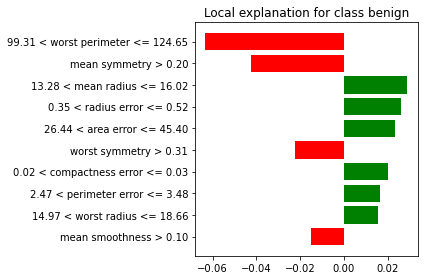

In [33]:
from lime.lime_tabular import LimeTabularExplainer
explainer = LimeTabularExplainer(x_test,
    feature_names=feature_names,
    class_names=target_names,
    categorical_features=[],
    mode='classification')

exp = explainer.explain_instance(x_test[0], lr.predict_proba, num_features=10)

exp.as_pyplot_figure()
plt.tight_layout()

In [ ]:
# Commentaire :

<div class = "alert alert-block alert-info">
    Q3.2 - Comparer avec l'exemple suivant de la base de test.
</div>

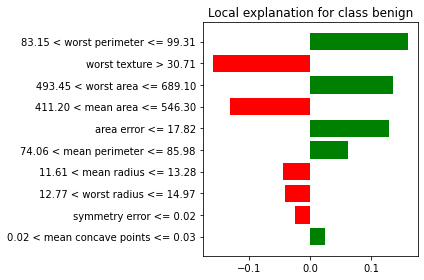

In [34]:
exp = explainer.explain_instance(x_test[1], lr.predict_proba, num_features=10)

exp.as_pyplot_figure()
plt.tight_layout()

## 4 - Expérimentations

<div class="alert alert-block alert-info">
    Faire des tests pour examiner le comportement de LIME, par exemple pour examiner sa stabilité par rapport à la donné d'intérêt ou par rapport au classifieur, selon un protocole que vous définirez après avoir spécifié l'étude que vous souhaitez mener.
</div>

[('99.31 < worst perimeter <= 124.65', -0.07104592320982542), ('0.03 < concavity error <= 0.05', -0.03641023512453463), ('worst concave points > 0.16', -0.03212707568271125), ('mean compactness > 0.14', 0.027152963631494508), ('mean symmetry > 0.20', 0.022728138143214262), ('546.30 < mean area <= 798.30', 0.02266879977491297), ('25.82 < worst texture <= 30.71', -0.0219130303197752), ('worst concavity > 0.39', -0.020504910182197182), ('0.00 < fractal dimension error <= 0.00', -0.018257739349189946), ('mean concavity > 0.14', 0.016216761412707344)]


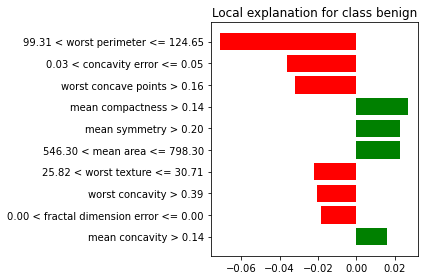

In [63]:
exp = explainer.explain_instance(x_test[0], lr.predict_proba, num_features=10)
print(exp.as_list())
exp.as_pyplot_figure()
plt.tight_layout()

## 5 - Données textuelles

<div class="alert alert-block alert-warning">
    Nous allons apprendre un modèle de classification random forest sur les données <code>fetch_20newsgroups</code> puis utiliser LIME pour obtenir des explications sur la classification d'exemples.
</div>

<div class = "alert alert-block alert-info">
À l'aide de la <a href="https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py">documentation du dataset fetch_20newsgroups</a>,  apprendre un modèle random forest de classification bi-classe de texte.
</div>

<div class = "alert alert-block alert-info">
Utilisez LIME pour obtenir des explications sur les prédictions obtenues sur des exemples.
    </div>

## 6 - Implémentation de LIME

<div class="alert alert-block alert-info">
    Sur des données textuelles, implémentez une version rudimentaire de LIME en utilisant la fonction de proximité proposée dans le cours. Retrouvez-vous les mêmes vecteurs d'importance qu'avec la bibliothèque LIME ?
</div>